# Análisis Econométrico con Python y Statsmodels

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

## Importando paquetes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Cargando data

In [ ]:
pip install ISLP

In [ ]:
from ISLP import load_data
Boston = load_data('Boston')

In [ ]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

- CRIM: Tasa de criminalidad per cápita por área.
- ZN: Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
- INDUS: Proporción de acres de negocios no minoristas por ciudad.
- CHAS: Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario).
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones).
- RM: Número medio de habitaciones por vivienda.
- AGE: Proporción de unidades ocupadas por el propietario construidas antes de 1940.
- DIS: Distancias ponderadas a cinco centros de empleo de Boston.
- RAD: Índice de accesibilidad a carreteras radiales.
- TAX: Tasa de impuesto a la propiedad de valor total por `$10,000`.
- PTRATIO: Proporción alumno-profesor por localidad.
- LSTAT: Porcentaje de la población de menor estatus.
- MEDV: Valor medio de las viviendas ocupadas por el propietario en `$1000`.

## Selección de variables

<Axes: >

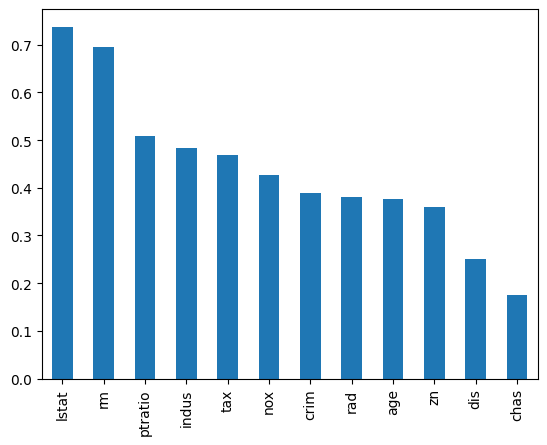

In [ ]:
Boston.corr().medv.abs().sort_values(ascending=False)[1:].plot(kind='bar')

In [ ]:
df = Boston[['medv','lstat','rm']]
df.head()

,medv,lstat,rm
0,24.0,4.98,6.575
1,21.6,9.14,6.421
2,34.7,4.03,7.185
3,33.4,2.94,6.998
4,36.2,5.33,7.147


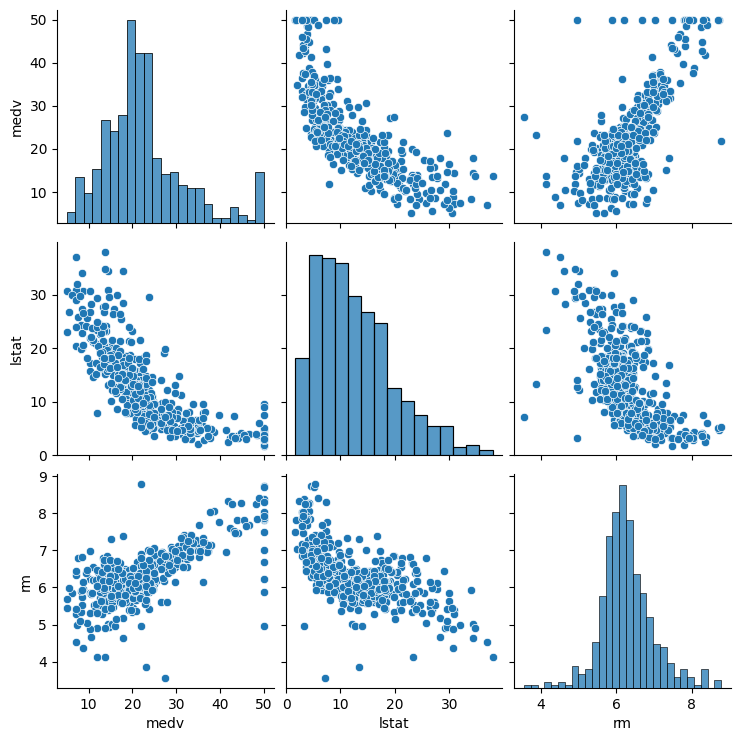

In [ ]:
sns.pairplot(df)

## Estimando el modelo

In [ ]:
modelo = smf.ols("medv ~ lstat + rm", data=df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          7.01e-112
Time:                        07:23:18   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6

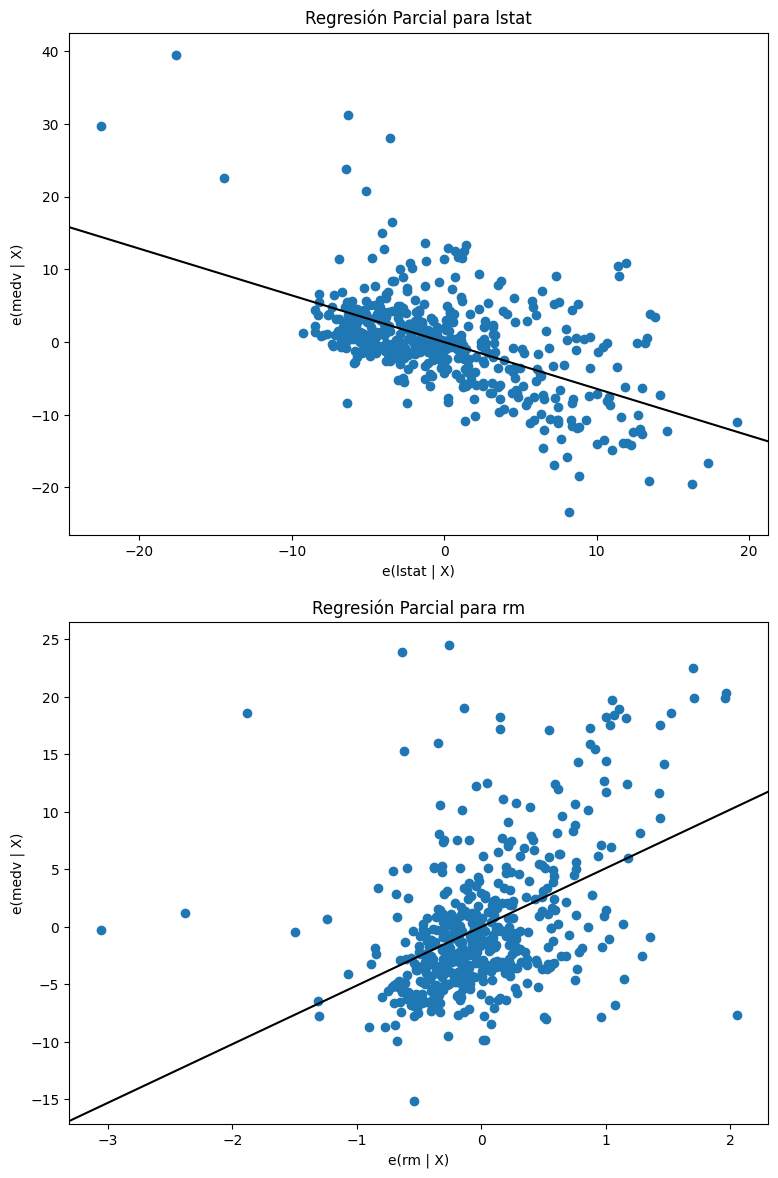

In [ ]:
from statsmodels.graphics.regressionplots import plot_partregress

fig, axs = plt.subplots(2, 1, figsize=(8, 12))

plot_partregress('medv', 'lstat', ['rm'], data=df, obs_labels=False, ax=axs[0])
axs[0].set_title('Regresión Parcial para lstat')

plot_partregress('medv', 'rm', ['lstat'], data=df, obs_labels=False, ax=axs[1])
axs[1].set_title('Regresión Parcial para rm')

plt.tight_layout(pad=1.5)
plt.show()

## Pruebas de hipotesis

### 1. Prueba t para cada coeficiente

$$H_0: β_1 \cdot  (1) =0$$

In [ ]:
print("Pruebas t:")
print(modelo.t_test([0, 1, 0]))

Pruebas t:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.6424      0.044    -14.689      0.000      -0.728      -0.556


$$H_0: β_2 \cdot  (1) =0$$

In [ ]:
print(modelo.t_test([0, 0, 1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             5.0948      0.444     11.463      0.000       4.222       5.968


### 2. Prueba t para combinacion de parametros igual a cero

$$H_0: β_1 \cdot  (1) + β_2 \cdot  (1) =0$$

In [ ]:
print(modelo.t_test([0, 1, 1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             4.4524      0.473      9.422      0.000       3.524       5.381


$$H_0: β_1 \cdot  (8) + β_2 \cdot  (1) =0$$

In [ ]:
print(modelo.t_test([0, 8, 1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0441      0.715     -0.062      0.951      -1.448       1.360


### 3. Prueba F para la significancia global del modelo

In [ ]:
resultado_prueba = modelo.f_test("lstat = rm = 0")
print("Prueba F para la significancia global del modelo:")

print("\nEstadístico F:", resultado_prueba.fvalue)
print("Valor p:", resultado_prueba.pvalue)
print("Grados de libertad:", resultado_prueba.df_num, "y", resultado_prueba.df_denom)

Prueba F para la significancia global del modelo:

Estadístico F: 444.33089222433387
Valor p: 7.008455349884948e-112
Grados de libertad: 2.0 y 503.0


In [ ]:
resultado_prueba = modelo.f_test("8*lstat + rm = 0")
print("Prueba F para la combinación lineal 8*lstat + rm = 0:")

print("\nEstadístico F:", resultado_prueba.fvalue)
print("Valor p:", resultado_prueba.pvalue)
print("Grados de libertad:", resultado_prueba.df_num, "y", resultado_prueba.df_denom)

Prueba F para la combinación lineal 8*lstat + rm = 0:

Estadístico F: 0.003803429875208457
Valor p: 0.9508485721991239
Grados de libertad: 1.0 y 503.0


## Evaluacion de supuestos

### 1. Normalidad de residuos

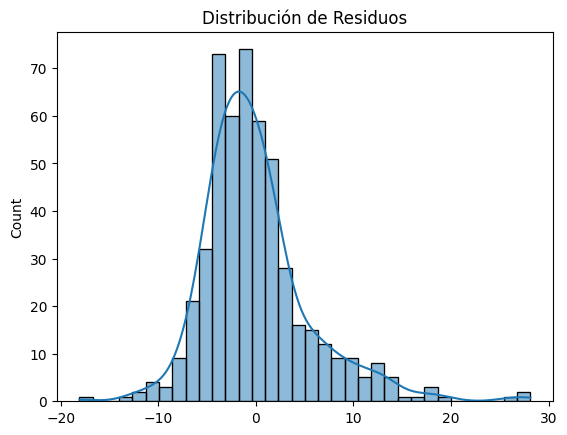

In [ ]:
residuos = modelo.resid
fig, ax = plt.subplots()
sns.histplot(residuos, kde=True, ax=ax)
ax.set_title('Distribución de Residuos')
plt.show()

In [ ]:
from scipy.stats import shapiro
stat, p_value = shapiro(residuos)
print("Estadístico de prueba:", stat,"\nValor p:", p_value)

alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

Estadístico de prueba: 0.9097991585731506 
Valor p: 9.090163698797569e-17
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


In [ ]:
from scipy.stats import shapiro, norm

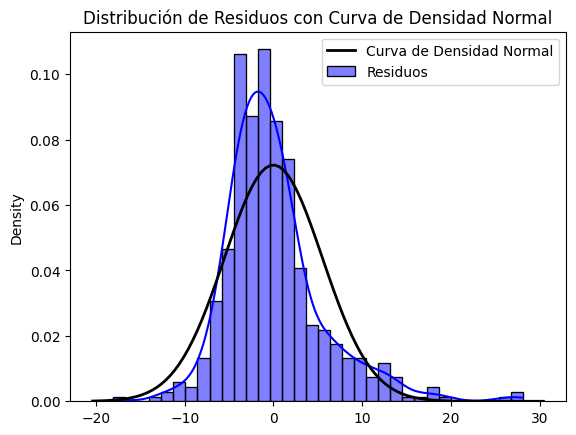

In [ ]:
fig, ax = plt.subplots()
sns.histplot(residuos, kde=True, ax=ax, stat="density", color='blue', label='Residuos')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(residuos), np.std(residuos))
ax.plot(x, p, 'k', linewidth=2, label='Curva de Densidad Normal')

ax.set_title('Distribución de Residuos con Curva de Densidad Normal')
ax.legend()
plt.show()

### 2. Homocedasticidad

In [ ]:
predicciones = modelo.predict(df)
residuos_estandarizados = modelo.get_influence().resid_studentized_internal

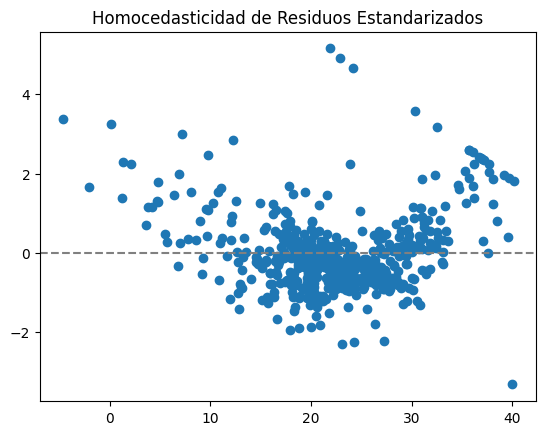

In [ ]:
fig, ax = plt.subplots()
ax.scatter(predicciones, residuos_estandarizados)
ax.axhline(y=0, color='gray', linestyle='--')
ax.set_title('Homocedasticidad de Residuos Estandarizados')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

_, p_value, _, _ = het_breuschpagan(modelo.resid, modelo.model.exog)
print("Valor p del Test de Breusch-Pagan:", p_value)

alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula. No hay evidencia de heterocedasticidad.")
else:
    print("Se rechaza la hipótesis nula. Hay evidencia de heterocedasticidad.")

Valor p del Test de Breusch-Pagan: 0.4653943799016529
No se rechaza la hipótesis nula. No hay evidencia de heterocedasticidad.


### 3. Autocorrelación de residuos

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_stat = durbin_watson(modelo.resid)

print("Estadístico de Durbin-Watson:", durbin_watson_stat)

# Para datos no ordenados en el tiempo, un valor cerca de 2 indica no autocorrelación.
# Valores cercanos a 0 o 4 sugieren autocorrelación positiva o negativa, respectivamente.

Estadístico de Durbin-Watson: 0.8342146070001708


### 4. Multicolinealidad (VIF)

In [ ]:
modelo.model.exog

array([[1.   , 4.98 , 6.575],
       [1.   , 9.14 , 6.421],
       [1.   , 4.03 , 7.185],
       ...,
       [1.   , 5.64 , 6.976],
       [1.   , 6.48 , 6.794],
       [1.   , 7.88 , 6.03 ]])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = modelo.model.exog
vif = pd.DataFrame()
vif['Variable'] = ['cons','lstat', 'rm']
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)
# Solo analizamos las variables que(no la constante)

  Variable         VIF
0     cons  165.952438
1    lstat    1.604520
2       rm    1.604520
